In [1]:
with open("data_description.txt", 'r') as file:
    data_description = file.read()
    print(data_description)

1. StudentID: Unique identifier for each student
2. school: Student's school ('GP' - Gombe Prime or 'MS' - Methodist School)
3. sex: Student's sex ('F' - female or 'M' - male)
4. age: Student's age (numeric: from 15 to 22)
5. address: Student's home address type ('U' - urban or 'R' - rural)
6. famsize: Family size ('LE3' - less than or equal to 3 or 'GT3' - greater than 3)
7. pstatus: Parent's cohabitation status ('T' - living together or 'A' - apart)
8. medu: Mother's education level (categorical)
9. fedu: Father's education level (categorical)
10. mjob: Mother's occupation
11. fjob: Father's occupation
12. reason: Reason for choosing the school
13. guardian: Student's guardian ('mother', 'father', or 'other')
14. traveltime: Home to school travel time (numeric: 1 - less than 15 min, 2 - 15 to 30 min, 3 - 30 min to 1 hour, or 4 - more than 1 hour)
15. studytime: Weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours)
16. failu

In [2]:
# Import the necessary libraries
import numpy as np      # NumPy: A library for numerical computing in Python
import pandas as pd     # Pandas: A library for data manipulation and analysis
import seaborn as sns   # Seaborn: A library for statistical data visualization

In [3]:
# Load the dataset using Pandas read_csv method
data = pd.read_csv("student_performance.csv")  # Reads the CSV file and creates a DataFrame

In [4]:
# Display the first few rows of the dataset to get an overview
data.head()

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,745263,GP,F,18,R,GT3,A,Tertiary education,Secondary education,other,...,4,1,1,1,1,very good,15,12.0,9.0,10
1,174740,MS,F,17,U,GT3,T,Tertiary education,Secondary education,at_home,...,4,3,3,2,2,very bad,5,9.0,NaN,11
2,308261,GP,F,15,U,LE3,T,Tertiary education,Secondary education,services,...,4,4,4,1,1,very good,4,12.0,11.0,11
3,337549,MS,F,17,U,GT3,T,Secondary education,Secondary education,other,...,4,5,3,1,1,very good,4,9.0,9.0,10
4,318969,GP,F,17,U,GT3,T,Postgraduate education,Postgraduate education,other,...,4,2,1,1,1,good,0,13.0,13.0,13


In [5]:
# Get the number of rows and column
data.shape

(544, 34)

In [6]:
# Get information about the dataset (e.g., number of rows, columns, data types, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   544 non-null    int64  
 1   school      544 non-null    object 
 2   sex         544 non-null    object 
 3   age         544 non-null    int64  
 4   address     544 non-null    object 
 5   famsize     540 non-null    object 
 6   Pstatus     544 non-null    object 
 7   Medu        544 non-null    object 
 8   Fedu        544 non-null    object 
 9   Mjob        544 non-null    object 
 10  Fjob        544 non-null    object 
 11  reason      544 non-null    object 
 12  guardian    544 non-null    object 
 13  traveltime  544 non-null    int64  
 14  studytime   544 non-null    int64  
 15  failures    544 non-null    int64  
 16  schoolsup   544 non-null    object 
 17  famsup      544 non-null    object 
 18  paid        539 non-null    object 
 19  activities  544 non-null    o

In [24]:
for i,j in zip(data.isna().sum(), data.columns):
    if i !=0:
        print(f"The {j} column has {i} missing values")

The famsize column has 4 missing values
The paid column has 5 missing values
The G1 column has 3 missing values
The G2 column has 3 missing values


## observation:
#### Missing Values:
   1. The **famsize** column has 540 non-null values, indicating 4 missing values.
   2. The **paid** column has 539 non-null values, indicating 5 missing values.
   3. The **G1 and G2** have missing values too.

#### Categorical Features:

school, sex, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, and romantic.

In [7]:
# Summary statistics of numerical columns EDD
data.describe()

,StudentID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G1,G2,Grade
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,541.000000,541.000000,544.000000
mean,545647.773897,17.121324,1.577206,1.904412,0.220588,4.003676,3.198529,3.181985,1.509191,2.283088,3.738971,11.240296,11.632163,11.757353
std,260288.577310,6.399815,0.763771,0.813140,0.581370,2.198272,1.072474,1.269404,0.955698,1.296265,4.790440,2.711007,5.511570,3.274425
min,104000.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,314137.000000,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,0.000000,9.000000,10.000000,10.000000
50%,546997.000000,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,2.000000,11.000000,11.000000,12.000000
75%,764553.750000,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,6.000000,13.000000,13.000000,14.000000
max,999684.000000,150.000000,4.000000,4.000000,3.000000,50.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.000000,120.000000,19.000000


## Observations:

  1.  The **StudentID** column contain large NUmbers, and serves as an identifier for individual students and doesn't provide any meaningful quantitative information related to the students' performance or other attributes. It primarily acts as a unique key to distinguish between different students in the dataset.
  2. The **age** distribution seems to have some outliers, as a maximum age of 150 is unexpected for students.
  3. The **famrel** column represents the quality of family relationships on a numeric scale from 1 to 5.The maximum value is 50, which is significantly higher than the expected range of 1 to 5.
  4. The **absences** column exhibits potential outliers. The maximum value of 93 indicates that some students have a significantly higher number of school absences, which might be considered unusual compared to the majority of students.
  5. The **G2** column seems to have a maximum value of 18. This may or may not be an outlier depending on the grading scale and context of the dataset. To make a definitive conclusion, we need more information about the grading system or whether it is feasible for students to score such high grades.

In [8]:

categorical_columns = []
for col in data.columns:
    # Check if the column is categorical (object datatype)
    if data[col].dtype == 'object':
        categorical_columns.append(col)
        
categorical_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'health']

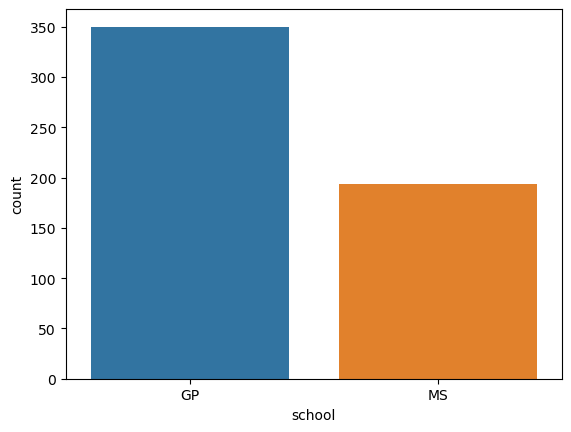

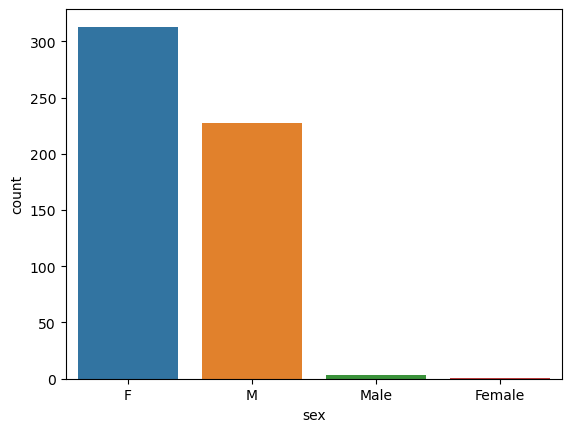

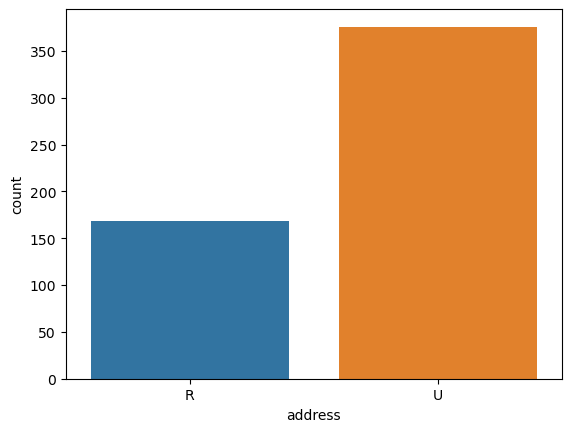

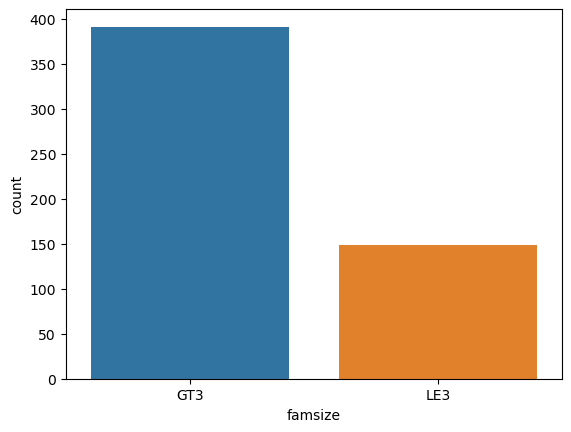

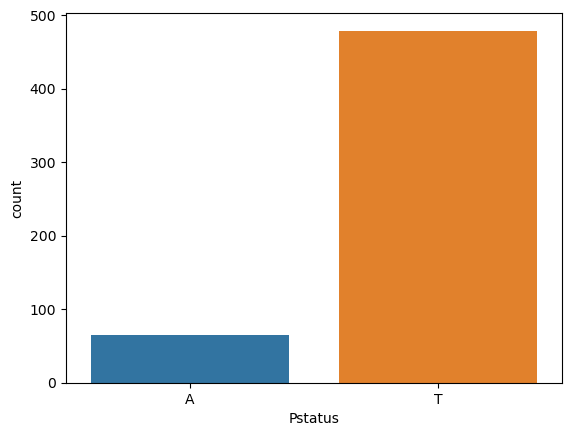

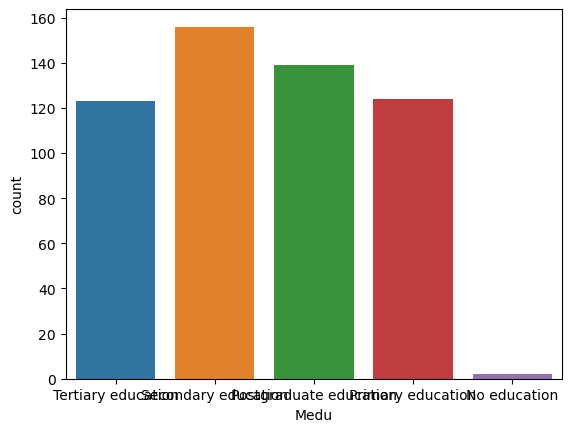

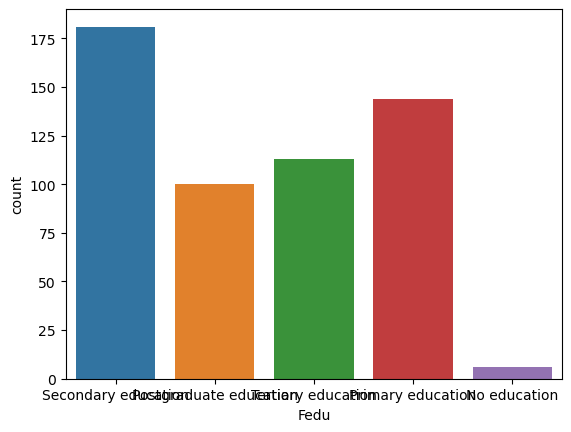

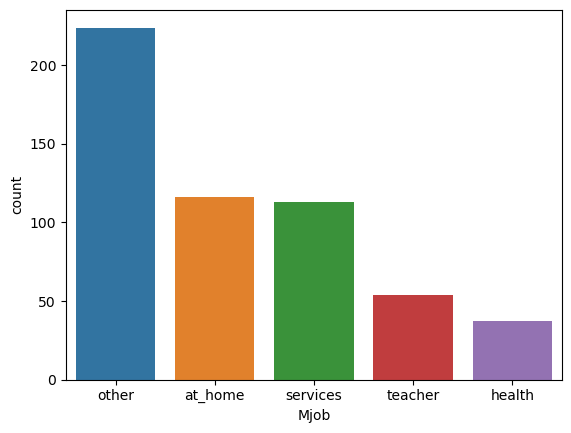

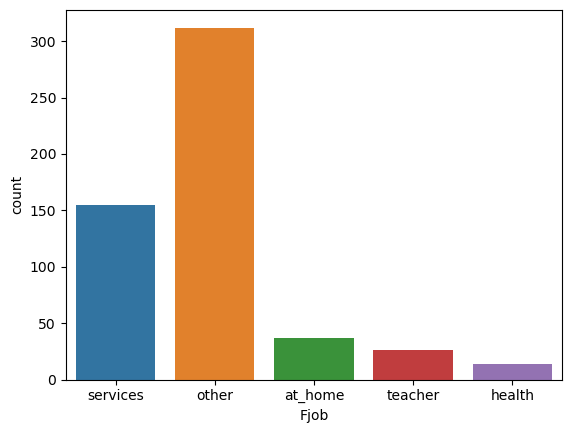

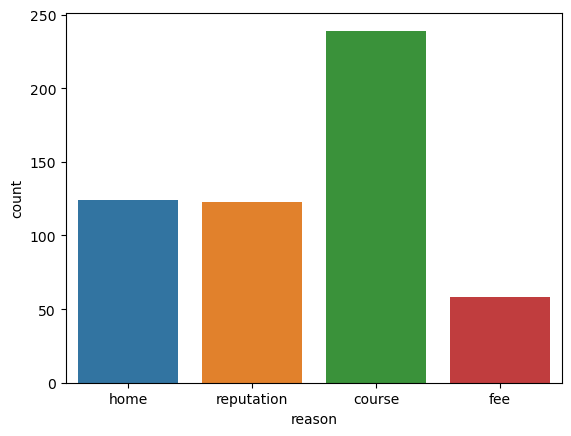

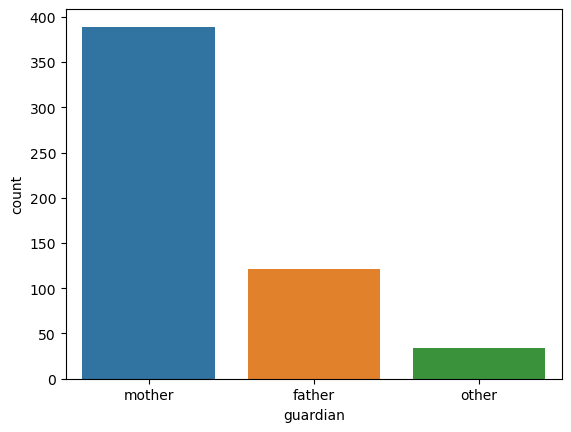

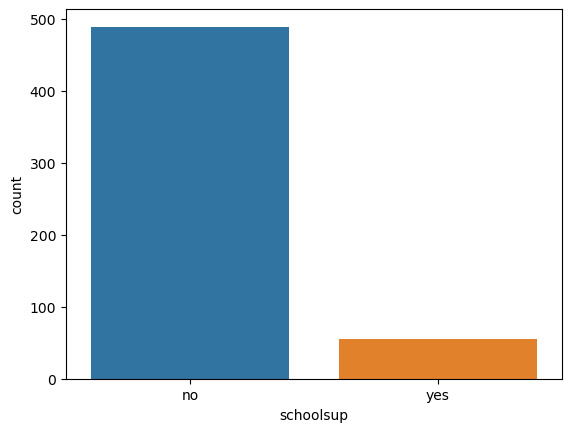

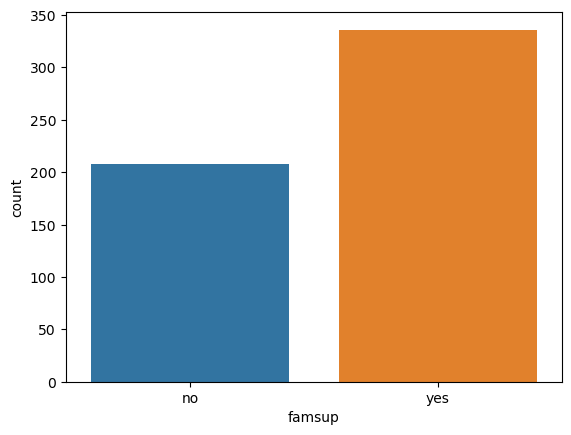

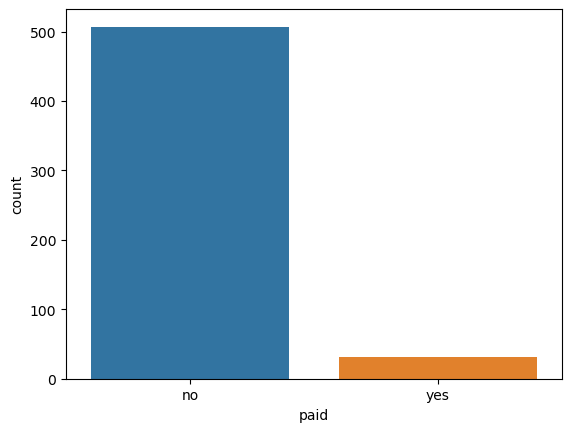

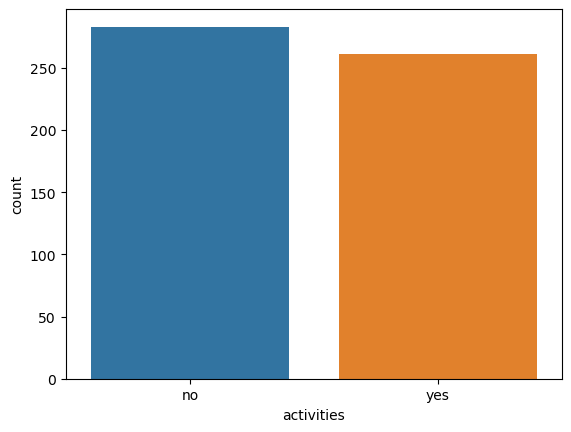

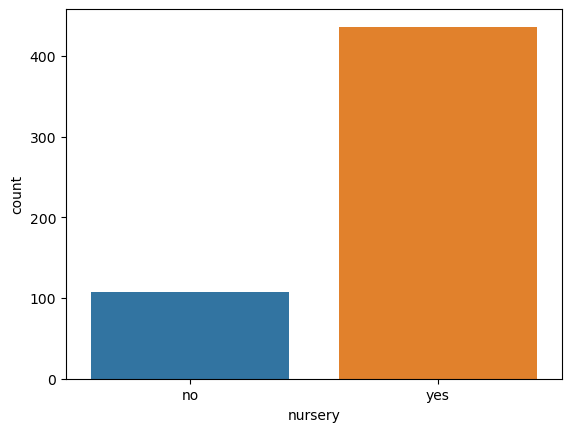

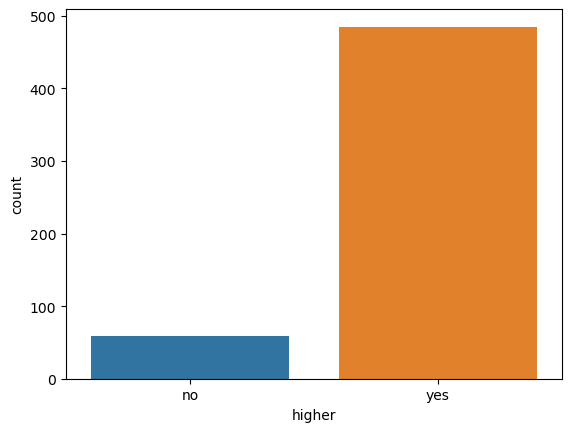

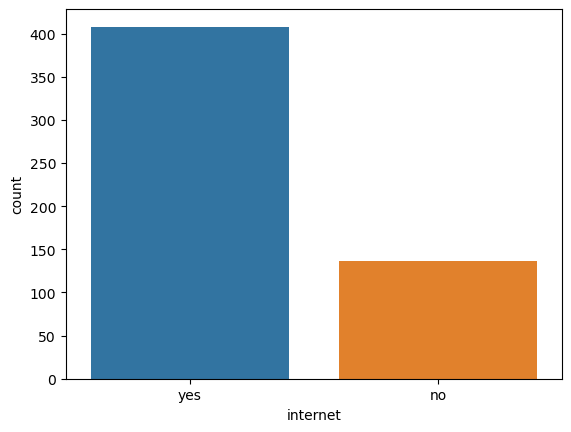

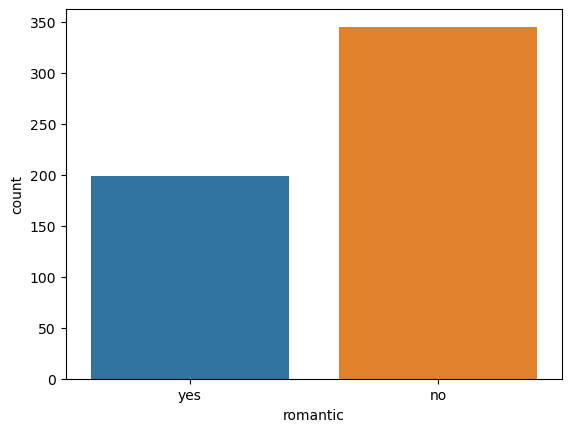

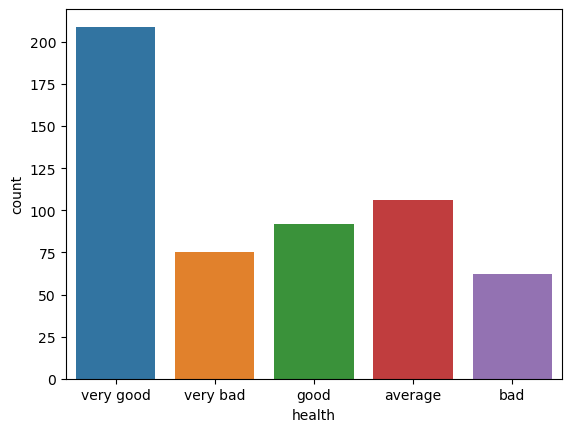

In [10]:
import matplotlib.pyplot as plt

# Set up a grid to display count plots


# Loop through each column in the DataFrame
for i, col in enumerate(categorical_columns):
    plt.figure()  # forces a new figure
    # Create a count plot for categorical columns
    sns.countplot(data=data, x=col,)
#     print("{} plotting {} ".format(i,col))


## handling MIssing Value


In [29]:
# filled Categorical with Mode
data["famsize"] = data["famsize"].fillna(data["famsize"].mode()[0])
data["paid "] = data["paid "].fillna(data["paid "].mode()[0])

In [36]:
# filled Numberical with mean
data["G1"] = data["G1"].fillna(data["G1"].mean())

In [37]:
# outliers in G2
data["G2"][data["G2"] >  20]

64    120.0
Name: G2, dtype: float64

In [39]:
# G2 Data without outliers
data["G2"][data["G2"] <  20]

0       9.0
2      11.0
3       9.0
4      13.0
5      13.0
       ... 
539     9.0
540    10.0
541    15.0
542    10.0
543    13.0
Name: G2, Length: 540, dtype: float64

In [41]:
data["G2"] = data["G2"].fillna(data["G2"][data["G2"] <  20].mean())

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   544 non-null    int64  
 1   school      544 non-null    object 
 2   sex         544 non-null    object 
 3   age         544 non-null    int64  
 4   address     544 non-null    object 
 5   famsize     544 non-null    object 
 6   Pstatus     544 non-null    object 
 7   Medu        544 non-null    object 
 8   Fedu        544 non-null    object 
 9   Mjob        544 non-null    object 
 10  Fjob        544 non-null    object 
 11  reason      544 non-null    object 
 12  guardian    544 non-null    object 
 13  traveltime  544 non-null    int64  
 14  studytime   544 non-null    int64  
 15  failures    544 non-null    int64  
 16  schoolsup   544 non-null    object 
 17  famsup      544 non-null    object 
 18  paid        539 non-null    object 
 19  activities  544 non-null    o

In [43]:
data.describe()

,StudentID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G1,G2,Grade
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,545647.773897,17.121324,1.577206,1.904412,0.220588,4.003676,3.198529,3.181985,1.509191,2.283088,3.738971,11.240296,11.631056,11.757353
std,260288.577310,6.399815,0.763771,0.813140,0.581370,2.198272,1.072474,1.269404,0.955698,1.296265,4.790440,2.703508,5.496344,3.274425
min,104000.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,314137.000000,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,0.000000,9.000000,10.000000,10.000000
50%,546997.000000,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,2.000000,11.000000,11.000000,12.000000
75%,764553.750000,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,6.000000,13.000000,13.000000,14.000000
max,999684.000000,150.000000,4.000000,4.000000,3.000000,50.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.000000,120.000000,19.000000


In [44]:
# Create an empty list to store column names with 2 categories
columns_with_two_categories = []

# Loop through each column in the DataFrame
for col in data.columns:
    # Check if the column has exactly 2 unique categories
    if data[col].nunique() == 2:
        columns_with_two_categories.append(col)

In [45]:
columns_with_two_categories

['school',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [49]:
from sklearn.preprocessing import OneHotEncoder
encoded_data = pd.DataFrame()
# Loop through each column in the DataFrame
for col in data.columns:
    # Check if the column has exactly 2 unique categories
    if data[col].nunique() == 2:
        # Create a new OneHotEncoder instance
        encoder = OneHotEncoder()
        
        # Reshape the data to fit the encoder (required for single feature)
        reshaped_data = data[col].values.reshape(-1, 1)
        
        # Fit and transform the data using the encoder
        encoded_column = encoder.fit_transform(reshaped_data)
        
        # Convert the sparse matrix to a DataFrame
        encoded_column_df = pd.DataFrame(encoded_column.toarray(), columns=[f"{col}_{category}" for category in encoder.categories_[0]])
        
        # Append the encoded column to the encoded_data DataFrame
        encoded_data = pd.concat([encoded_data, encoded_column_df], axis=1)
# Remove columns ending with "_no"
encoded_data = encoded_data.drop(columns=[col for col in encoded_data.columns if col.endswith('_no')])

# Concatenate the original non-binary columns with the one-hot encoded columns
encoded_data = pd.concat([data.drop(columns=columns_with_two_categories), encoded_data], axis=1)

In [50]:
encoded_data.head()

,StudentID,sex,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,paid_nan,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,745263,F,18,Tertiary education,Secondary education,other,services,home,mother,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,174740,F,17,Tertiary education,Secondary education,at_home,other,home,mother,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,308261,F,15,Tertiary education,Secondary education,services,other,reputation,mother,1,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,337549,F,17,Secondary education,Secondary education,other,at_home,course,mother,1,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,318969,F,17,Postgraduate education,Postgraduate education,other,teacher,course,mother,1,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
